Enter the number of frames (n): 3
Enter the size of the reference string (m): 7
Enter the reference string (space-separated): 0 1 2 3 2 1 0

Current stack: ['0'] | Hits: 0 | Misses: 1

Current stack: ['0', '1'] | Hits: 0 | Misses: 2

Current stack: ['0', '1', '2'] | Hits: 0 | Misses: 3

Current stack: ['1', '2', '3'] | Hits: 0 | Misses: 4

Current stack: ['1', '3', '2'] | Hits: 1 | Misses: 4

Current stack: ['3', '2', '1'] | Hits: 2 | Misses: 4

Current stack: ['2', '1', '0'] | Hits: 2 | Misses: 5

Total Hits: 2
Total Misses: 5
Hit Ratio: 0.29

Frame States:
  Reference String Frame 1 Frame 2 Frame 3 Hit/Miss
0                0       0    None    None     Miss
1                1       0       1    None     Miss
2                2       0       1       2     Miss
3                3       1       2       3     Miss
4                2       1       3       2      Hit
5                1       3       2       1      Hit
6                0       2       1       0     Miss




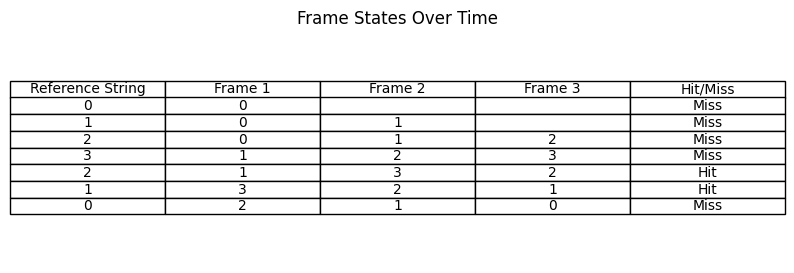

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

def lru_page_replacement(n, reference_string):
    stack = []  # Initialize an empty stack
    hits = 0
    misses = 0
    frame_states = []  # To store the state of frames after each page request
    results = []  # To store hit/miss results

    for page in reference_string:
        if page in stack:
            # Page hit
            hits += 1
            stack.remove(page)  # Remove the page from its current position
            stack.append(page)  # Push it to the top (most recent)
            results.append('Hit')
        else:
            # Page miss
            misses += 1
            if len(stack) < n:
                stack.append(page)  # If there's space in stack
            else:
                stack.pop(0)  # Remove the least recently used page
                stack.append(page)  # Add the new page
            results.append('Miss')

        # Record the state of the frames
        frame_states.append(list(stack))

        # Print the current stack
        print(f"\nCurrent stack: {stack} | Hits: {hits} | Misses: {misses}")

    return hits, misses, frame_states, results

def main():
    n = int(input("Enter the number of frames (n): "))
    m = int(input("Enter the size of the reference string (m): "))
    reference_string = input("Enter the reference string (space-separated): ").split()

    hits, misses, frame_states, results = lru_page_replacement(n, reference_string)

    print(f"\nTotal Hits: {hits}")
    print(f"Total Misses: {misses}")
    print(f"Hit Ratio: {hits / (hits + misses) if (hits + misses) > 0 else 0:.2f}")

    # Create a DataFrame to visualize the frame states
    df = pd.DataFrame(frame_states, columns=[f'Frame {i + 1}' for i in range(n)])
    df.insert(0, 'Reference String', reference_string)
    df.insert(4, 'Hit/Miss', results)  # Insert Hit/Miss column

    print("\nFrame States:")
    print(df)
    print("\n")

    # Plotting the frame states
    fig, ax = plt.subplots(figsize=(10, 3))
    ax.axis('tight')
    ax.axis('off')
    ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')
    plt.title('Frame States Over Time')
    plt.show()

if __name__ == "__main__":
    main()